In [1]:
from graphs.network_visualization import create_graph, plot_network

import pandas as pd

# Visualize test connections

In [2]:
file_path = '../data/test_connections.csv'
df = pd.read_csv(file_path)
df

,source,destination,package count
0,192.168.0.22,Extern,130
1,192.168.0.22,192.168.0.255,29
2,Extern,192.168.0.1,7
3,Extern,Extern,14
4,Extern,192.168.0.22,96
5,192.168.0.254,192.168.0.1,102
6,192.168.0.1,192.168.0.254,60
7,Extern,192.168.0.254,2
8,192.168.0.254,192.168.0.255,1
9,Extern,192.168.0.23,3401


In [3]:
data = {tuple(r.values())[:2]:list(r.values())[2] for r in df.to_dict('records')}
data

{('192.168.0.22', 'Extern'): 130,
 ('192.168.0.22', '192.168.0.255'): 29,
 ('Extern', '192.168.0.1'): 7,
 ('Extern', 'Extern'): 14,
 ('Extern', '192.168.0.22'): 96,
 ('192.168.0.254', '192.168.0.1'): 102,
 ('192.168.0.1', '192.168.0.254'): 60,
 ('Extern', '192.168.0.254'): 2,
 ('192.168.0.254', '192.168.0.255'): 1,
 ('Extern', '192.168.0.23'): 3401,
 ('192.168.0.22', '192.168.0.23'): 4,
 ('192.168.0.23', '192.168.0.22'): 4,
 ('192.168.0.23', 'Extern'): 2822,
 ('192.168.0.23', '192.168.0.255'): 1}

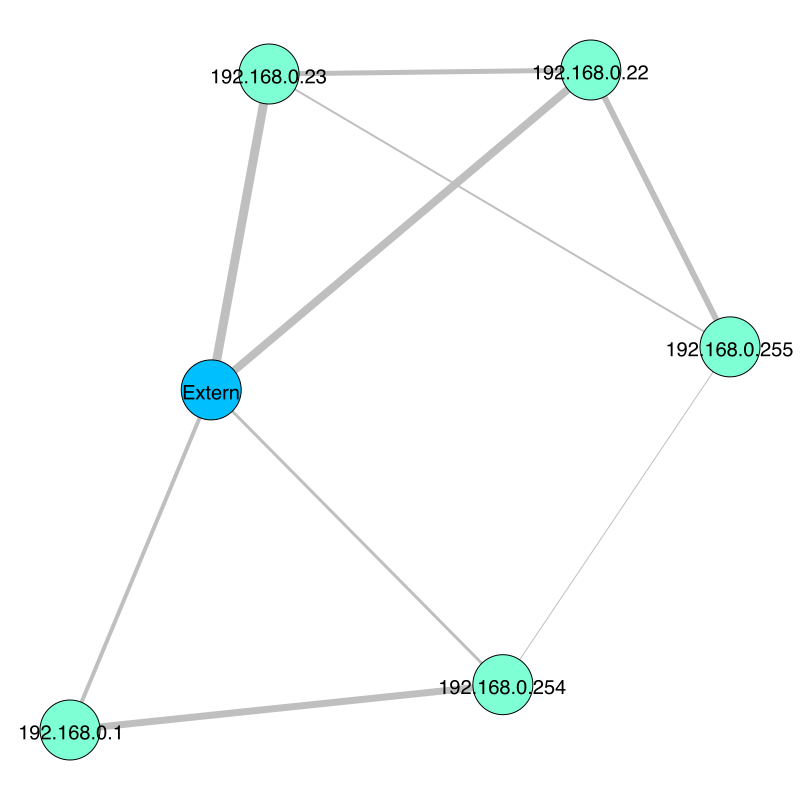

In [4]:
network = create_graph(data)
plot_network(network)

# Visualize connections of '149.171.126.2' and '59.166.0.1'

In [5]:
file_path = '../data/netflow_sample.parquet'

df = pd.read_parquet(file_path)
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Dataset,IPV4_SRC_ADDR_EX,IPV4_SRC_ADDR_INT,IPV4_DST_ADDR_EX,IPV4_DST_ADDR_INT
0,59.166.0.0,17126,149.171.126.4,10504,17,0,528,4,304,4,...,0,0,0,0,Benign,NF-UNSW-NB15-v2,1,250465,1,64741
1,172.31.66.95,54109,172.31.0.2,53,17,0,75,1,135,1,...,22095,1,25,0,Benign,NF-CSE-CIC-IDS2018-v2,1,78819,1,78507
2,192.168.1.31,65219,192.168.1.195,8400,6,0,44,1,0,0,...,0,0,0,0,Benign,NF-ToN-IoT-v2,1,150954,0,150949
3,172.31.67.42,50159,172.31.0.2,53,17,0,59,1,123,1,...,976,1,60,0,Benign,NF-CSE-CIC-IDS2018-v2,1,78879,1,78507
4,192.168.1.34,54762,192.168.1.180,3527,6,0,44,1,0,0,...,0,0,0,0,Benign,NF-ToN-IoT-v2,1,150957,0,150941


In [6]:
df['TOTAL_PKTS'] = df['IN_PKTS'] + df['OUT_PKTS']
df = df[['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'TOTAL_PKTS']]
df.head()

,IPV4_SRC_ADDR,IPV4_DST_ADDR,TOTAL_PKTS
0,59.166.0.0,149.171.126.4,8
1,172.31.66.95,172.31.0.2,2
2,192.168.1.31,192.168.1.195,1
3,172.31.67.42,172.31.0.2,2
4,192.168.1.34,192.168.1.180,1


In [7]:
data = {tuple(r.values())[:2]:list(r.values())[2] for r in df.to_dict('records')}
data

{('59.166.0.0', '149.171.126.4'): 68,
 ('172.31.66.95', '172.31.0.2'): 2,
 ('192.168.1.31', '192.168.1.195'): 9,
 ('172.31.67.42', '172.31.0.2'): 2,
 ('192.168.1.34', '192.168.1.180'): 1,
 ('172.31.66.65', '172.31.0.2'): 2,
 ('175.45.176.1', '149.171.126.15'): 18,
 ('192.168.100.3', '192.168.100.148'): 2,
 ('190.73.106.44', '172.31.65.51'): 6,
 ('193.111.198.65', '172.31.66.60'): 23,
 ('59.166.0.1', '149.171.126.3'): 74,
 ('172.31.64.28', '172.31.0.2'): 2,
 ('140.243.165.139', '172.31.66.81'): 9,
 ('59.166.0.5', '149.171.126.3'): 8,
 ('59.166.0.5', '149.171.126.5'): 4,
 ('192.168.100.3', '192.168.100.150'): 2,
 ('192.168.100.148', '192.168.217.2'): 1,
 ('59.166.0.0', '149.171.126.2'): 4,
 ('192.168.100.3', '192.168.100.147'): 2,
 ('192.168.1.31', '192.168.1.49'): 2,
 ('213.202.230.206', '172.31.69.10'): 36,
 ('192.168.1.31', '192.168.1.46'): 1,
 ('59.166.0.5', '149.171.126.8'): 100,
 ('192.168.1.184', '192.168.1.31'): 2,
 ('172.31.68.10', '172.31.0.2'): 2,
 ('172.31.66.37', '172.31.0.2

In [8]:
filtered_data = {}
for key in data.keys():
    if '149.171.126.2' in key:
        filtered_data[key] = data[key]

    if '59.166.0.1' in key:
        filtered_data[key] = data[key]
filtered_data

{('59.166.0.1', '149.171.126.3'): 74,
 ('59.166.0.0', '149.171.126.2'): 4,
 ('59.166.0.2', '149.171.126.2'): 95,
 ('59.166.0.1', '149.171.126.6'): 4,
 ('59.166.0.1', '149.171.126.0'): 4,
 ('59.166.0.3', '149.171.126.2'): 4,
 ('59.166.0.1', '149.171.126.7'): 248,
 ('59.166.0.1', '149.171.126.1'): 40,
 ('59.166.0.4', '149.171.126.2'): 32,
 ('59.166.0.1', '149.171.126.8'): 20,
 ('59.166.0.1', '149.171.126.2'): 95,
 ('59.166.0.8', '149.171.126.2'): 95,
 ('59.166.0.1', '149.171.126.4'): 95,
 ('59.166.0.5', '149.171.126.2'): 182,
 ('59.166.0.9', '149.171.126.2'): 70,
 ('59.166.0.6', '149.171.126.2'): 22,
 ('59.166.0.7', '149.171.126.2'): 46,
 ('59.166.0.1', '149.171.126.9'): 28,
 ('59.166.0.1', '149.171.126.5'): 20,
 ('149.171.126.2', '59.166.0.1'): 968,
 ('149.171.126.7', '59.166.0.1'): 21,
 ('149.171.126.1', '59.166.0.1'): 135,
 ('149.171.126.2', '59.166.0.3'): 12,
 ('149.171.126.0', '59.166.0.1'): 64,
 ('149.171.126.4', '59.166.0.1'): 644,
 ('149.171.126.2', '59.166.0.2'): 6,
 ('149.171.1

In [9]:
g = create_graph(filtered_data)

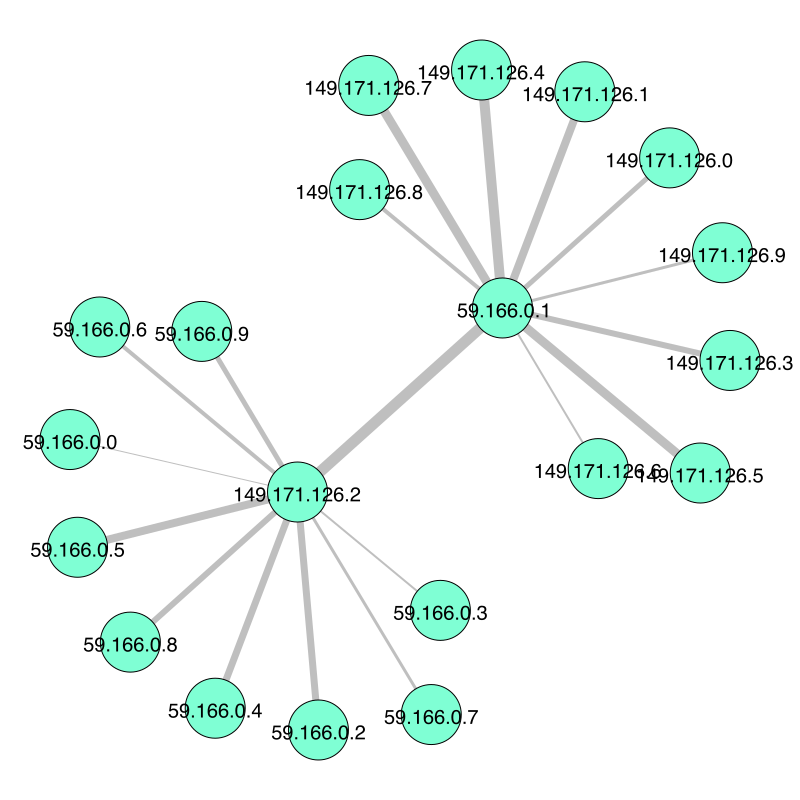

In [10]:
plot_network(g)

In [11]:
print(g)

IGRAPH UN-- 20 19 --
+ attr: name (v), count (e)
+ edges (vertex names):
149.171.126.3--59.166.0.1, 149.171.126.2--59.166.0.0,
59.166.0.2--149.171.126.2, 149.171.126.6--59.166.0.1,
149.171.126.0--59.166.0.1, 59.166.0.3--149.171.126.2,
149.171.126.7--59.166.0.1, 149.171.126.1--59.166.0.1,
59.166.0.4--149.171.126.2, 59.166.0.1--149.171.126.8,
149.171.126.2--59.166.0.1, 59.166.0.8--149.171.126.2,
149.171.126.4--59.166.0.1, 59.166.0.5--149.171.126.2,
149.171.126.2--59.166.0.9, 59.166.0.6--149.171.126.2,
59.166.0.7--149.171.126.2, 59.166.0.1--149.171.126.9,
149.171.126.5--59.166.0.1
